In [ ]:

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

# Function to get product title
def get_title(soup):
    title = soup.find('span', {'id': 'productTitle'})
    return title.text.strip() if title else None

# Function to get product price
def get_price(soup):
    price = soup.find('span', {'id': 'priceblock_ourprice'})
    if not price:
        price = soup.find('span', {'id': 'priceblock_dealprice'})
    return price.text.strip() if price else None

# Function to get product rating
def get_rating(soup):
    rating = soup.find('span', {'class': 'a-icon-alt'})
    return rating.text.strip() if rating else None

# Function to get product review count
def get_review_count(soup):
    review_count = soup.find('span', {'id': 'acrCustomerReviewText'})
    return review_count.text.strip() if review_count else None

# Function to get product availability
def get_availability(soup):
    availability = soup.find('div', {'id': 'availability'})
    return availability.text.strip() if availability else None

if __name__ == '__main__':
    # Add your user agent
    HEADERS = {'User-Agent':'', 'Accept-Language': 'en-US, en;q=0.5'}

    # The webpage URL
    URL = "https://www.amazon.com/s?i=kitchen-intl-ship&bbn=16225011011&rh=n%3A284507%2Cn%3A1063916&dc&ds=v1%3AbSXUyOqoDBa3DbK2ksEpJHrxD0wHiuFJwqpnuX6BZJ0&qid=1694079242&rnid=284507&ref=sr_nr_n_7"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class': 'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
        links_list.append(link.get('href'))

    d = {"title": [], "price": [], "rating": [], "reviews": [], "availability": []}

    # Loop for extracting product details from each link
    for link in links_list:
        new_webpage = requests.get("https://www.amazon.com" + link, headers=HEADERS)
        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))
        d['availability'].append(get_availability(new_soup))

    amazon_df = pd.DataFrame.from_dict(d)
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['title'])
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)

# Save the DataFrame as a CSV file
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)


In [ ]:
amazon_df

,title,price,rating,reviews,availability
0,Homaxy 100% Cotton Waffle Weave Kitchen Dish C...,None,4.5 out of 5 stars,"20,880 ratings",In Stock
1,Everlasting Comfort – The Original Seat Cushio...,None,4.4 out of 5 stars,"125,807 ratings",Only 19 left in stock - order soon
2,"Utopia Kitchen Spandex Tablecloth 2 Pack [6FT,...",None,4.7 out of 5 stars,"13,354 ratings",In Stock
3,"Premium Kitchen,Hand Towels (20”x 28”, 6 Pack)...",None,4.7 out of 5 stars,"8,606 ratings",In Stock
4,Swedish Wholesale Swedish DishCloths for Kitch...,None,4.6 out of 5 stars,"53,382 ratings",
5,Syntus 2 Pack Adjustable Bib Apron Waterdrop R...,None,4.4 out of 5 stars,"41,774 ratings",In Stock
6,KMAT Kitchen Mat [2 PCS] Cushioned Anti-Fatigu...,None,4.3 out of 5 stars,"43,256 ratings",In Stock
7,sancua Rectangle Tablecloth - 60 x 84 Inch - S...,None,4.4 out of 5 stars,"16,645 ratings",In Stock
8,Potholders Set Trivets Set 100% Pure Cotton Th...,None,4.8 out of 5 stars,"18,173 ratings",In Stock
9,ABCCANOPY Spandex Tablecloths for 6 ft Home Re...,None,4.8 out of 5 stars,"17,631 ratings",In Stock


In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Load the CSV file into a DataFrame
amazon_df = pd.read_csv("amazon_data.csv")

# Replace 0 and NaN values in all columns with 1
amazon_df.replace(0, 1, inplace=True)
amazon_df.fillna(1, inplace=True)

# Save the updated DataFrame as a CSV file
amazon_df.to_csv("amazon_data_updated.csv", header=True, index=False)

# Print the DataFrame in a tabular format
table = tabulate(amazon_df, headers='keys', tablefmt='psql', showindex=False)
print(table)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+--------------------+-----------------+------------------------------------+
| title                                                                                                                                                                                                    |   price | rating             | reviews         | availability                       |
|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+--------------------+-----------------+------------------------------------|
| Homaxy 100% Cotton Waffle Weave Kitchen Dish Cloths, Ultra Soft Absorbent Quick Drying Dish Towels, 12x12 Inches, 6-Pack, Dar

In [ ]:
import pandas as pd
import numpy as np
import re
from tabulate import tabulate

# Load the updated CSV file into a DataFrame
amazon_df = pd.read_csv("amazon_data_updated.csv")

# Function to extract and convert numeric values from the 'reviews' column
def extract_ratings(text):
    matches = re.findall(r'(\d+,\d+|\d+) ratings', text)
    if matches:
        return int(matches[0].replace(',', ''))
    return np.nan

# Apply the function to convert the 'reviews' column to numeric
amazon_df['reviews'] = amazon_df['reviews'].apply(extract_ratings)

# Calculate mean, median, and standard deviation of 'reviews' column
mean_reviews = amazon_df['reviews'].mean()
median_reviews = amazon_df['reviews'].median()
std_deviation_reviews = amazon_df['reviews'].std()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Std Deviation'],
    'Reviews': [mean_reviews, median_reviews, std_deviation_reviews]
})

# Print the summary table
table = tabulate(summary_df, headers='keys', tablefmt='psql', showindex=False)
print(table)


+---------------+-----------+
| Statistic     |   Reviews |
|---------------+-----------|
| Mean          |   24727.6 |
| Median        |   16645   |
| Std Deviation |   25876.3 |
+---------------+-----------+


<Figure size 800x600 with 0 Axes>

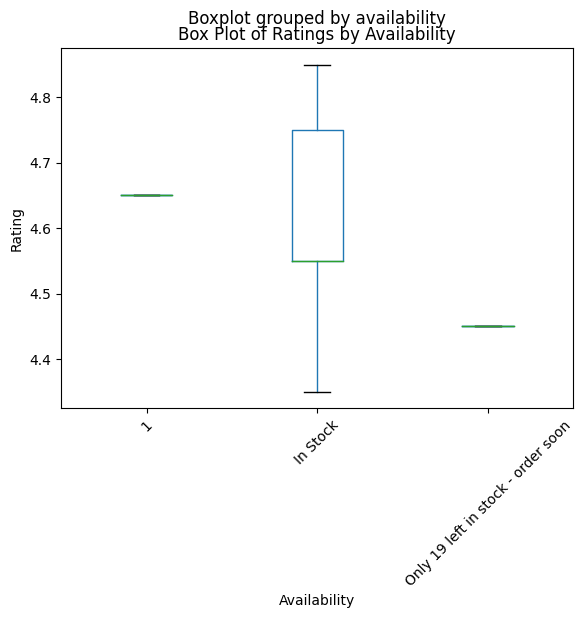

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Load the updated CSV file into a DataFrame
amazon_df = pd.read_csv("amazon_data_updated.csv")

# Extract and convert numeric ratings from the 'rating' column
amazon_df['rating'] = amazon_df['rating'].str.replace('[^\d.]', '', regex=True).astype(float)

# Create the box plot
plt.figure(figsize=(8, 6))
amazon_df.boxplot(column='rating', by='availability', grid=False)
plt.title('Box Plot of Ratings by Availability')
plt.xlabel('Availability')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load the updated CSV file into a DataFrame
amazon_df = pd.read_csv("amazon_data_updated.csv")

# Preprocess 'rating' and 'reviews' columns to ensure they contain numeric values
amazon_df['rating'] = amazon_df['rating'].str.replace('[^\d.]', '', regex=True).astype(float)
amazon_df['reviews'] = amazon_df['reviews'].str.replace('[^\d.]', '', regex=True).astype(float)

# Generate summary statistics for numeric columns
summary_stats = amazon_df[['rating', 'reviews']].describe()
print(summary_stats)


          rating        reviews
count  25.000000      25.000000
mean    4.618000   24727.640000
std     0.157374   25876.339057
min     4.350000     177.000000
25%     4.550000    8712.000000
50%     4.550000   16645.000000
75%     4.750000   36170.000000
max     4.850000  125807.000000


In [ ]:
# Convert 'reviews' column to string
amazon_df['reviews'] = amazon_df['reviews'].astype(str)

# Extract numeric part and convert to float
amazon_df['reviews'] = amazon_df['reviews'].str.replace(',', '', regex=True).str.extract('(\d+)').astype(float)

# Summary statistics for numeric columns
summary_stats = amazon_df[['rating', 'reviews']].astype(float).describe()
summary_stats

,rating,reviews
count,25.000000,25.000000
mean,4.618000,24727.640000
std,0.157374,25876.339057
min,4.350000,177.000000
25%,4.550000,8712.000000
50%,4.550000,16645.000000
75%,4.750000,36170.000000
max,4.850000,125807.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(summary_stats, *['rating'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(summary_stats, *['reviews'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(summary_stats, *['rating'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(summary_stats, *['reviews'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(summary_stats, *[[['rating', 'reviews']]], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(summary_stats, *[[['rating', 'reviews']]], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(summary_stats, *['reviews'], **{})
chart

In [ ]:
# Frequency counts for 'availability'
availability_counts = amazon_df['availability'].value_counts()
availability_counts

In Stock                              23
Only 19 left in stock - order soon     1
1                                      1
Name: availability, dtype: int64

In [ ]:
# Frequency counts for 'availability'
availability_counts = amazon_df['availability'].value_counts()
print(availability_counts)

In Stock                              23
Only 19 left in stock - order soon     1
1                                      1
Name: availability, dtype: int64


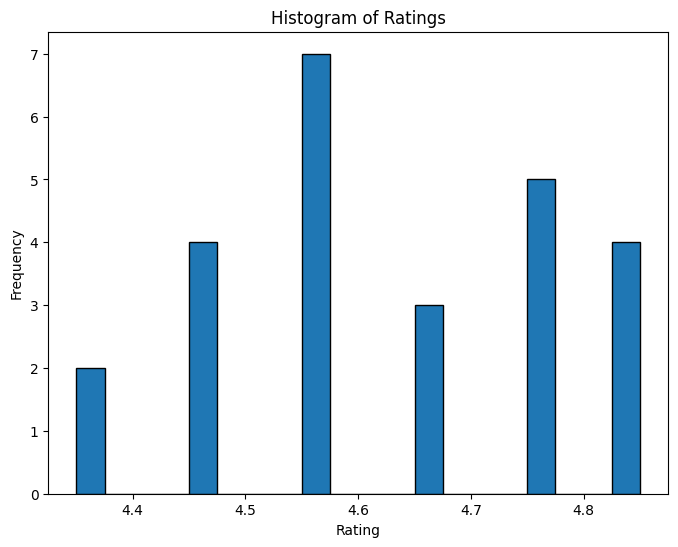

In [ ]:
# Histogram of 'rating'
plt.figure(figsize=(8, 6))
plt.hist(amazon_df['rating'].astype(float), bins=20, edgecolor='k')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()